# Windows of Opportunity: Increasing employee retention through candidate promotability and promotion window identification.

[Nikhil Gupta](guptan@mail.smu.edu), [Hayley Horn](hhorn@mail.smu.edu), [Max Moro](mmoro@mail.smu.edu), [Michael Tieu](mtieu@mail.smu.edu)

## Table of Contents <a class="anchor" id="TOC"></a> 

<font size = 4>[Business Understanding](#Section1)</font>

<font size = 4>[Data Understanding](#Section2)</font> <br>
* [Data Dictionary](#DP_Dict)<br>
* [Basic Setup](#DP_Setup)<br>
* [Loading Libraies](#DP_Loading)<br>
* [Data Processing](#DP_DP)<br>

<font size = 4>[Modeling and Evaluation](#Section3) </font><br>
* [Evaluation Metrics for Cluster Analysis](#ME_Metrics)<br>
* [K-Means Clustering](#ME_KM)<br>
* [Agglomerative Clustering](#ME_AG)
* [Final Model](#EM_Final)<br>
* [Cluster Comparison](#EM_CC)<br>
* [Notable Observations](#EM_NO)<br>

<font size = 4>[Deployment](#Section8)</font>

<font size = 4>[Exceptional Work](#Section9) </font>
* [Cluster Evaluation Heatmap](#EW_1)<br>
* [Python “More” Package](#EW_2)<br>

<font size = 4>[Conclusion](#Section10) </font><br>


## <font color=maroon>Business Purpose</font><a class="anchor" id="Section1"></a>

In previous stages in this study, we explored our data set with the intent of understanding the underlying factors behind employee promotability. We used classification models to predict both employee promotability and an estimated time window for an employee's subsequent promotion. We have also touched on initial ideas for reporting and deploying these models for employee promotability. 

One feature that was isolated from our prior analysis was employee attrition. This feature was removed in our classification activity because an inherent assumption of promotability and a promotion window is employee retention. In order to capture a holistic view of our employee base, we realize the need to understand the features upon which employee attrition is associated. 

As a result, the purpose of this study is to launch a deep dive into understanding factors influencing employee attrition, especially for employees with potential<sup>*</sup>. We reintroduce the <Strong>voluntary_attrition</strong> feature to our dataset and use a clustering approach to determine the key characteristics of those who left voluntarily. The intention here is to 1) identify key correlations between features and attrition and 2) provide support for organizational and structural changes in order to boost employee retention. 


<br>

<sup>*</sup> Employees with potential here are defined as those who have received a promotion in the past. 


[Back to Table of Contents](#TOC)


## <font color=maroon>Data Understanding</font><a class="anchor" id="Section2"></a>

To better understand the key nuances within our dataset, we filter out features that are categorical in nature. These features provide an inherent distinction between groups and so insight can be obtained without the use of any advanced algorithms. The purpose of this exercise was to look at continuous variables in order to gain any insight that might help reduce attrition in the future. 

In prior analyses to understand our employees, we evaluated our features according to a total of eight themes. These features will be reunited for the purpose of this study. This allows us to look at our dataset in a comprehensive manner, as clusters will take into account all themes rather than potentially partitioning and diluting any meaningful insights that may arise. 

Below is a data dictionary of all the (non-categorical) attributes available within this obtained dataset that are used for clustering.
 
As for attribute types, nominal field types largely indicate the factor-level attributes. In some instances, these also indicate the binary aspect of our attributes, such as whether or not a person received a promotion. We also have interval data, which represents data in a span of time, ratio data, which represents interval data with respect to an absolute 0 value, and ordinal data, which represents categorical data. 


[Back to Table of Contents](#TOC)



### <i>Data Dictionary</i><a class="anchor" id="DP_Dict"></a>



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-dvpl{border-color:inherit;text-align:left;vertical-align:top}
.rendered_html .table.tg { text-align: left; }  <!-- This overrides the right align -->

</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Attribute</th>
    <th class="tg-c3ow">Type</th>
    <th class="tg-c3ow">Unique Values</th>
    <th class="tg-c3ow">Range</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr>
    <td class="tg-0pky">ppa_rating_last</td>
    <td class="tg-c3ow">Ordinal</td>
    <td class="tg-dvpl">7</td>
    <td class="tg-dvpl">1-5</td>
    <td class="tg-0pky">The most recent performance rating the person received. The rating goes from 1 (poor) to 5 (excellent)</td>
  </tr>
  <tr>
    <td class="tg-0pky">comparatio_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">4980</td>
    <td class="tg-dvpl">0.5045-1.9676</td>
    <td class="tg-0pky">The most recent comparatio of the person. Comparatio is the ratio between the person salary and a predefined target salary for the job and country the employee mapped into. This value has been anonymized and scaled.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_points_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">50</td>
    <td class="tg-dvpl">0-65</td>
    <td class="tg-0pky">Number of events of awards in form of 'Points' received during the month. Points is a form of small and immediate monetary recognition. Points can be converted into products.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_points_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">1267</td>
    <td class="tg-dvpl">0-3640</td>
    <td class="tg-0pky">Number of Points received during the month.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_bonus_cnt_sum_last </td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">14</td>
    <td class="tg-dvpl">0-13</td>
    <td class="tg-0pky">Number of events of awards in form of monetary bonus received during the month.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_bonus_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">2373</td>
    <td class="tg-dvpl">0-323.34</td>
    <td class="tg-0pky">Amount of awards in form of monetary bonus received during the month. This value has been scaled to grant anonymity of data.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_peer_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">38</td>
    <td class="tg-dvpl">0-58</td>
    <td class="tg-0pky">Number of peer recognition received. A Peer recognition is non-monetary form of recognition given between employees.</td>
  </tr>
  <tr>
    <td class="tg-0pky">movement_lateral_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">6</td>
    <td class="tg-dvpl">0-5</td>
    <td class="tg-0pky">Number of lateral movements received. A lateral movement is when an employees changes job but there is no change in the gjs_sort_order.</td>
  </tr>
  <tr>
    <td class="tg-0pky">movement_demote_event_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">3</td>
    <td class="tg-dvpl">0-2</td>
    <td class="tg-0pky">Number of demotion received. A demotion is a change from one gjs_sort_order to a lower one.</td>
  </tr>
  <tr>
    <td class="tg-0pky">transfer_event_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">8</td>
    <td class="tg-dvpl">0-7</td>
    <td class="tg-0pky">Number of transfers. A transfer is a change in group or cost center.</td>
  </tr>
  <tr>
    <td class="tg-0pky">promotion_cnt</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">5</td>
    <td class="tg-dvpl">0-4</td>
    <td class="tg-0pky">1 if the person received a promotion, 0 if not. A promotion is a change from one gjs_sort_order to a higher one.</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_Y_last</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-1</td>
    <td class="tg-0pky">1 if the person is currently a supervisor, 0 if is an individual contributor.</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_Y_max</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-1</td>
    <td class="tg-0pky">1 if the person is or has been a supervisor, 0 if was never been a a supervisor.</td>
  </tr>
  <tr>
    <td class="tg-0pky">span_of_control_direct_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">67</td>
    <td class="tg-dvpl">0-118</td>
    <td class="tg-0pky">Number of employees directly reporting to the individual.</td>
  </tr>
  <tr>
    <td class="tg-0pky">span_of_control_total_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">155</td>
    <td class="tg-dvpl">0-2590</td>
    <td class="tg-0pky">Number of employees directly and indirectly reporting to the individual.</td>
  </tr>
  <tr>
    <td class="tg-0pky">spv_ppa_rating_last</td>
    <td class="tg-c3ow">Ordinal</td>
    <td class="tg-dvpl">7</td>
    <td class="tg-dvpl">1-5</td>
    <td class="tg-0pky">The most recent performance rating of the supervisor of the person. The rating goes from 1 (poor) to 5 (excellent).</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_code_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl">1-4</td>
    <td class="tg-0pky">Count of countries where the person worked since last promotion.</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_region_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">3</td>
    <td class="tg-dvpl">1-3</td>
    <td class="tg-0pky">Number of regions where the person worked since last promotion.</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_segment_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl">1-4</td>
    <td class="tg-0pky">Number of country segments where the person worked since last promotion.</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_city_code_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">5</td>
    <td class="tg-dvpl">1-5</td>
    <td class="tg-0pky">Number of cities where the person worked.</td>
  </tr>
    <tr>
    <td class="tg-0pky">site_desc_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">6</td>
    <td class="tg-dvpl">1-6</td>
    <td class="tg-0pky">Number of sites where the person worked.</td>
  </tr>
  <tr>
    <td class="tg-0pky">mgr_01_nunique - mgr_14_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">18</td>
    <td class="tg-dvpl">0-18</td>
    <td class="tg-0pky">Number of distinct managers the person worked with, by organizational chart of the worker. Mgr01 is the CEO and mgr02 is 2nd level, etc.</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">15</td>
    <td class="tg-dvpl">1-15</td>
    <td class="tg-0pky">Number of distinct supervisors the person worked with.</td>
  </tr>
   <tr>
    <td class="tg-0pky">reporting_level_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">12</td>
    <td class="tg-dvpl">1-12</td>
    <td class="tg-0pky">Number of reporting levels up to the company CEO.</td>
  </tr>
   <tr>
    <td class="tg-0pky">accountability_matrix_label_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">5</td>
    <td class="tg-dvpl">1-5</td>
    <td class="tg-0pky">Number of organizations the person worked with.</td>
  </tr>
  <tr>
    <td class="tg-0pky">company_code_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl">1-4</td>
    <td class="tg-0pky">Number of company entities the person worked with.</td>
  </tr>
  <tr>
    <td class="tg-0pky">cost_center_code_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">10</td>
    <td class="tg-dvpl">1-10</td>
    <td class="tg-0pky">Number of cost centers the person worked in.</td>
  </tr>
  <tr>
    <td class="tg-0pky">org_unit_desc_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">13</td>
    <td class="tg-dvpl">1-14</td>
    <td class="tg-0pky">Number of company's organizational units the person worked in.</td>
  </tr>
  <tr>
    <td class="tg-0pky">operational_rollup_label_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">8</td>
    <td class="tg-dvpl">1-8</td>
    <td class="tg-0pky">Number of company's operational groups (groups of organizational units) the person worked in.</td>
  </tr>
  <tr>
    <td class="tg-0pky">gjs_code_label_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl">1-4</td>
    <td class="tg-0pky">Number of distinct job frameworks and levels the person has been mapped into.</td>
  </tr>
  <tr>
    <td class="tg-0pky">gjs_framework_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">3</td>
    <td class="tg-dvpl">1-3</td>
    <td class="tg-0pky">Number of distinct job frameworks the person has been mapped into.</td>
  </tr>
  <tr>
    <td class="tg-0pky">job_family_label_nunique</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">6</td>
    <td class="tg-dvpl">1-6</td>
    <td class="tg-0pky">Number of distinct job families the person has been mapped into.</td>
  </tr>
  <tr>
    <td class="tg-0pky">tenure_in_months_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">395</td>
    <td class="tg-dvpl">1-511</td>
    <td class="tg-0pky">Number of months of seniority in the company.</td>
  </tr>
  <tr>
    <td class="tg-0pky">voluntary_attrition</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-1</td>
    <td class="tg-0pky">Contains 1 if the person voluntarily left the company.</td>
  </tr>
 
</table>

[Back to Table of Contents](#TOC)


### <i>Basic Setup</i><a class="anchor" id="DP_Setup"></a>

The basic setup for this project requires loading Python libraries. We also created a custom function (calc_SSB) to calculate the Sum of Squares as this feature is not available directly for the Agglomerative Clustering library. This function is needed to have a direct comparison between K-Means and Agglomerative Clustering.


### <i>Loading Libraries</i><a class="anchor" id="DP_Loading"></a>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import logging
import math

# Data Splitting
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit  # Only applicable for classification problem

# Preprocessing and Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Diagnosis
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Scoring
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt

# for Model Comparison
from scipy.stats import t

# For Time Logging
import time
from contextlib import contextmanager

# For hyperparameter optimization
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt import gp_minimize
import skopt.plots

# The awesome more library!
from more import hyperopt_helper as hh
from more import viz_helper as vh
from more import pandas_helper
from more.scikit_helper.cluster import KMeansHelper as kmh
from more.scikit_helper.cluster import AgglomerativeHelper as agh  # only needed if using the agglomerative Helper

#cluseting library
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import cluster

In [2]:
%matplotlib inline  
## Setup plot and logger. 
logging.getLogger().setLevel(logging.INFO)
plt.style.use('ggplot')

In [3]:
max_jobs = 30  #Issue with the Max's Server when using jobs=-1 (who knows why?)

In [4]:
# Function to calculate Sum of Squares Measure as it is not available in all the models

def calc_SSB(X,labels,scaling=True):
    from scipy.cluster.vq import vq
    if(scaling):
        std_scl=StandardScaler()
        Xbase2= pd.DataFrame(std_scl.fit_transform(Xbase.astype(np.float)))
    else:
        Xbase2=Xbase
    #labels = ac_model.labels_
    num_features = Xbase2.shape[1]
    centers = np.empty((num_features,0))
    for i in range(len(set(labels[labels != -1]))):
        single_cluster_means = Xbase2[labels==i].mean().to_numpy().reshape(num_features,1)
        centers = np.concatenate((centers,single_cluster_means),axis=1,out=None)
    
    centers=centers.T
    partition, euc_distance_to_centroids = vq(obs=Xbase2,code_book=centers)
    
    TSS = np.sum((Xbase2-Xbase2.mean(0))**2)
    SSW = np.sum(euc_distance_to_centroids**2)
    SSB = TSS - SSW
    return(SSW)



### <i>Data Processing</i><a class="anchor" id="DP_DP"></a>

**Removal of Unnecessary Features**: We limited this clustering practice to involve only continuous types, removing any categorical attributes in the process. This is because categorical attributes already are a type of cluster by proxy. This also allows a cleaner view into our employee types by having fewer potentially interacting or contradicting attributes. 

**Discretizing Target Variable** for this exploration task: Our data contains information on types of attrition in categorical format, which we redefined into the following discrete bins: 1 for voluntarily attrited, 0 for all others

**Feature Scaling:** Since we used distance based clustering techniques for this exercise, we needed to make sure that all the features were on the same scale before clustering. Otherwise, the feature with the maximum value could dominate the clustering. Hence, we scaled the data to have a mean of 0 and a standard deviation of 1 across all features.

#### Read in data file

In [5]:
# Reading data 
df_pre = pd.read_csv("../../data/data_for_classification.csv")
df_term = pd.read_csv("../../data/voluntary_attrition.csv")

In [6]:
# Sample of Termination records
df_term.head()

,worker,term_type,term_text
0,ADOQOR,Voluntary,Resign-Career
1,BHOKOZ,Voluntary,Resign-Career
2,AMKNPQ,Voluntary,Resign-Personal
3,AMNJRU,Voluntary,Resign-Relocation
4,AMNMSX,Voluntary,Resign-Relocation


#### Adding voluntary termination column

In [7]:
df_term_vol = df_term[df_term['term_type'].isin(['Voluntary'])][['worker']] #the dataset contains only voluntary, but we can eventually externd to other types
df_term_vol['voluntary_attrition']=1
df_term_vol.shape

(21807, 2)

In [8]:
df=df_pre.set_index('worker').join(df_term_vol.set_index('worker')).reset_index()
df['voluntary_attrition'].fillna(0,inplace=True)
df['voluntary_attrition'] = df['voluntary_attrition'].astype(int)

print('Count of Workers',df.shape[0])
print('Count of Voluntary Attrition',sum(df['voluntary_attrition']))
print('Ratio:',sum(df['voluntary_attrition'])/df.shape[0])


Count of Workers 94547
Count of Voluntary Attrition 25207
Ratio: 0.26660814198229454


#### Managing Nulls

* Nulls can cause errors for some models, depending on the quantity we will drop records with null values.

In [9]:
null_vals = df.isnull().sum(axis = 0)
print(null_vals[null_vals != 0])
df.dropna(inplace=True)

reporting_level_last                 14
accountability_matrix_label_last      3
functional_area_last                  3
job_family_label_last                 5
job_long_text_last                    6
operational_rollup_label_last       192
org_unit_desc_last                   44
dtype: int64


In [10]:
df.columns

Index(['worker', 'Unnamed: 0', 'promotion_cnt', 'promotion_max', 'year_last',
       'month_num_last', 'hiredAfter200901_max', 'months_since_promotion_max',
       'months_since_promotion_last', 'comparatio_last',
       'span_of_control_direct_last', 'span_of_control_total_last',
       'movement_lateral_cnt_sum_last', 'movement_demote_event_cnt_sum_last',
       'transfer_event_cnt_sum_last', 'changed_spv_cnt_sum_last',
       'awards_points_cnt_sum_last', 'awards_points_sum_last',
       'awards_bonus_cnt_sum_last', 'awards_bonus_sum_last',
       'awards_peer_cnt_sum_last', 'reporting_level_last', 'supervisor_Y_last',
       'supervisor_Y_max', 'tenure_in_months_last',
       'accountability_matrix_label_last',
       'accountability_matrix_label_nunique', 'company_code_last',
       'company_code_nunique', 'cost_center_code_last',
       'cost_center_code_nunique', 'functional_area_last',
       'functional_area_nunique', 'supervisor_last', 'supervisor_nunique',
       'mgr_01_nun

**Solution:** Dropping nulls as they comprise approximately <0.2% of the data

  
#### Defining features by theme

In [11]:
# Theme 1

rating_related_subset = ['ppa_rating_last', 'comparatio_last'
                  ,'awards_points_cnt_sum_last','awards_points_sum_last'
                  ,'awards_bonus_cnt_sum_last','awards_bonus_sum_last'
                  ,'awards_peer_cnt_sum_last'
                 ,'movement_lateral_cnt_sum_last','transfer_event_cnt_sum_last','movement_demote_event_cnt_sum_last'
                 ,'promotion_cnt']

In [12]:
# Theme 2
supervision_related = ['supervisor_Y_max','supervisor_Y_last','span_of_control_direct_last'
                       ,'span_of_control_total_last','spv_ppa_rating_last']

In [13]:
# Theme 3

region_related_subset = [
    'site_country_region_nunique','site_country_segment_nunique','site_country_code_nunique','site_desc_nunique'
    ,'site_city_code_nunique']


In [14]:
# Theme 4
manager_related = ['mgr_01_nunique','mgr_02_nunique','mgr_03_nunique','mgr_04_nunique'
                          ,'mgr_05_nunique','mgr_06_nunique','mgr_07_nunique','mgr_08_nunique'
                          ,'mgr_09_nunique','mgr_10_nunique','mgr_11_nunique','mgr_12_nunique'
                          ,'supervisor_nunique','changed_spv_cnt_sum_last'
                         ,'reporting_level_last' ]



In [15]:
# Theme 5
func_area_related_subset = ['accountability_matrix_label_nunique'
                            ,'cost_center_code_nunique'
                            ,'operational_rollup_label_nunique'
                            ,'org_unit_desc_nunique']
                                                                          
                                                                          

In [16]:
# Theme 6
job_grade_related_subset = ['gjs_framework_nunique','job_family_label_nunique']

In [17]:
# Theme 7
tenure_related_subset = ['tenure_in_months_last']

In [18]:
# Theme 8
education_related_subset = ['school_tier_last']


#### Create dataset for Clustering 

Instead of creating multiple clusters by theme, we are merging the numeric variables across all the themes. This allows us to look at our dataset in a comprehensive manner, as clusters will take into account all themes rather than potentially partitioning and diluting any meaningful insights that may arise.

For this study, we looked into a dataset used in a prior stage in this study that contains only the promoted employees (27,274 observations).  The subsetted variables were used for clustering, and the column <b> voluntary_attrition </b> was used to measure the resulting clusters.


In [19]:
df_cat2 = df[df['promotion_max']==1].drop('promotion_max',axis=1)


In [20]:
## Resetting the index, needed to avoid issues in the grouping and filters
df_cat2.reset_index(drop=True, inplace=True)
df_cat2.head()

,worker,Unnamed: 0,promotion_cnt,year_last,month_num_last,hiredAfter200901_max,months_since_promotion_max,months_since_promotion_last,comparatio_last,span_of_control_direct_last,...,site_country_region_nunique,site_country_segment_last,site_country_segment_nunique,site_desc_last,site_desc_nunique,ppa_rating_last,spv_ppa_rating_last,school_tier_last,certificate_order_grp_last,voluntary_attrition
0,ADGOMW,29,1,2018,5,0,13,13,0.9388,0,...,1,Taiwan,1,Stonebergers,1,3.0,3.0,0.0,02-Master Level Degree,0
1,ADGOMZ,35,1,2018,7,0,24,24,1.0278,9,...,1,Taiwan,1,Stonebergers,1,3.0,3.0,1.0,02-Master Level Degree,0
2,ADGONU,43,1,2019,5,0,35,35,1.0255,7,...,1,Japan,1,Rosing,1,4.0,4.0,0.0,08-Bachelor Level Degree,0
3,ADGONW,47,0,2018,2,1,49,49,0.8902,0,...,2,Japan,2,Rosing,2,4.0,4.0,0.0,08-Bachelor Level Degree,0
4,ADGOOQ,52,0,2017,11,1,46,46,0.8704,9,...,1,Japan,1,Rosing,1,3.0,3.0,0.0,08-Bachelor Level Degree,0


In [21]:


cl_cols = rating_related_subset +  supervision_related + region_related_subset + manager_related \
          + func_area_related_subset + job_grade_related_subset + tenure_related_subset +  ['voluntary_attrition']

# X contains all the variables, including voluntary
X = df_cat2[cl_cols]

# Xbase is used for clustering and doens't contain voluntary column. 
Xbase = X
Xbase = Xbase.helper.drop_columns(['voluntary_attrition'])
Xbase.columns

Index(['ppa_rating_last', 'comparatio_last', 'awards_points_cnt_sum_last',
       'awards_points_sum_last', 'awards_bonus_cnt_sum_last',
       'awards_bonus_sum_last', 'awards_peer_cnt_sum_last',
       'movement_lateral_cnt_sum_last', 'transfer_event_cnt_sum_last',
       'movement_demote_event_cnt_sum_last', 'promotion_cnt',
       'supervisor_Y_max', 'supervisor_Y_last', 'span_of_control_direct_last',
       'span_of_control_total_last', 'spv_ppa_rating_last',
       'site_country_region_nunique', 'site_country_segment_nunique',
       'site_country_code_nunique', 'site_desc_nunique',
       'site_city_code_nunique', 'mgr_01_nunique', 'mgr_02_nunique',
       'mgr_03_nunique', 'mgr_04_nunique', 'mgr_05_nunique', 'mgr_06_nunique',
       'mgr_07_nunique', 'mgr_08_nunique', 'mgr_09_nunique', 'mgr_10_nunique',
       'mgr_11_nunique', 'mgr_12_nunique', 'supervisor_nunique',
       'changed_spv_cnt_sum_last', 'reporting_level_last',
       'accountability_matrix_label_nunique', 'cost_c


## <font color=maroon>Modeling and Evaluation</font><a class="anchor" id="Section3"></a>

#### Measure used for Model Evaluation <a class="anchor" id="ME_Metrics"></a>


We had the need to identify a metric that can provide an objective method to select the best number of clusters. This will help balance the number of manageable clusters and the optimal performance of the model.

We decided to use K-Means and Hierarchical Aggloromerative Clustering for our analysis. Since both these are center-based techniques, we found the Silhouette Score and the Sum of Squares Error (SSE) to be ideal measures to compare these models. At the same time, we found that that while the Silhouette Score is biased towards a low number of clusters, the SSE is biased towards a high number of clusters. To compensate for such bias, we created a custom metric that finds the ideal balance between the two measures. 

The custom measure uses a normalized version of the Silhouette Score and the SSE, where both scores are normalized to be in the same range. For example, a Silhouette Score is normally between -1 and 1, but in our custom score we normalized this range to be between 0 and 1. Likewise, an SSE value ranges from 0 to the maximum variance of the whole dataset, but in our custom score we normalized this range to be between 0 and 1. This allowed us to easily combine the 2 metrics with a simple addition of terms (else the variable with the larger value would dominate the metric score).

Even with normalization we noticed that these two measure don't have equal ranges within our clusters. The normalized Silhouette Scores may range from 0.08 to 0.18 while the normalized SSE would range from 0.16 to 0.38. This situation will put much more weight on the SSE than on the Silhouette Score. To mitigate this risk, we applied different weights on the two measures based on their range across the clusters. 

Once we defined the optimal weights (details discussed in subsequent secions), we applied the same custom measure across all the models we used in this project.




### <i>K-Means Clustering</i><a class="anchor" id="ME_KM"></a>

We first tried the K-Means clustering model.

The baseline model uses the default parameters of n_init = 10, max_iter=300, and n_cluster = 5.

In [22]:
# Prepare baseline model 
kmeans = kmh(X=X.astype(np.float)
         ,n_clusters=5
         ,init =  'k-means++'
         ,evaluate_by='voluntary_attrition'
         ,n_jobs=max_jobs
         ,random_state=101
        )


In [23]:
kmeans.train().evaluate_fit()

Silhouette Coefficient: 0.18534839178729237


In [24]:
print("SSE score:",kmeans.cluster_obj.inertia_)

SSE score: 824248.7381581147


In [25]:
#calculate the Overall variance on X, this is needed to normlize inertia (Sum of Squares)
#this is calculating by assigning all the obersvations to a single cluster, and passing the features value to the calc_SSB function

labels = np.zeros((Xbase.shape[0]),np.int8)
Xbase_variance = calc_SSB(Xbase,labels,scaling=True)
print("Overall Variance is {}:".format(Xbase_variance))


Overall Variance is 1172782.0000000002:


* The model provided a SSE of 824,247 that is not a great improvements from the overall variance of 1,172,782. Hence we use an elbow plot to determine if we can improve the SSE value with a different number of clusters.


#### Parameter Adjustments


We then ran an elbow curve to identify the best number of clusters that maximizes the Silhouette Score and minimizes the SSE.

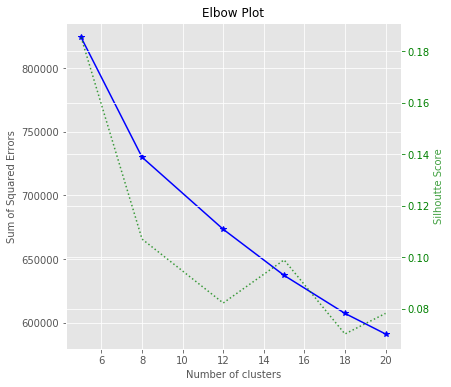

Wall time: 1min 44s


In [26]:
%%time
# Draw first elbow to calculate the weights between silhouette and Sum of Squares

cluster_ranges=[5,8,12,15,18,20]

# Elbow Curve with Helper function
kmeans.plot_elbow_curve(cluster_ranges=cluster_ranges
                        ,second_metric='silhoutte'
                        ,n_jobs=max_jobs
                        ,figsize=(6,6)
                       ) 

* From the above elbow plot, we see that there is no clear answer as to what value of N should be used. On one hand, using a lower N maximizes both the Silhouette Score and the SSE. On the other hand, a higher N gives the opposite effect. There is no obvious N that simultaneously maximizes the Silhouette Score and minimizes the SSE. Hence, we decided to run the parameter search through a Bayesian Grid Search to compute the optimal set of parameters (including N) that would minimize the custom metric (obtained when Silhouette Score is maximized and SSE is minimized).

* As explained above and as observed in the elbow plot, the range of values for the SSE and Silhouette Score are different (even after normalizing). Hence, we have to weigh these terms differently in the optimizer. We can obtain the weights from the elbow curve itself. For example, the range of Silhouette Score is 0.10 (from 0.08 to 0.18), which has a normalized value of 0.05<sup>*</sup> while the range of SSE is 220,000, which has a normalized value of 0.18 when divided by overall variance of 1.17E6. Hence, the weight ratio for the Silhouette Score to SSE is 0.18/0.05 = 3.6.

<br>
<sup>*</sup><font size =2> calculated as (0.18+1)/2 - (0.08+1)/2 </font>


In [27]:
weight_s = 3.6
weight_i = 1

* We calculated the custom score for the baseline model that will be used to compare with the resulting model from grid search.

In [28]:
measure_i = kmeans.cluster_obj.inertia_ / Xbase_variance
measure_sbase = mt.silhouette_score(Xbase,kmeans.cluster_obj.labels_,random_state=101)
measure_s = -(measure_sbase+1)*.5 #range of Silhouette is -1 to 1
print("    -> base inertia {} base silhouette {}".format( kmeans.cluster_obj.inertia_,measure_sbase))
print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
measure =(measure_i*weight_i) +(measure_s*weight_s)
print("Base model custom measure ", measure)

    -> base inertia 824248.7381581147 base silhouette 0.055202046198254674
    -> norm inertia 0.7028149631884822 norm silhouette -0.5276010230991274
Base model custom measure  -1.1965487199683764



* The baseline model has a custom score of: -1.198.

* We proceeded to find a better combination of parameters that can improve the score.

In [29]:
# Define the space
space = [Integer(5, 20, name='n_clusters')
         ,Integer(10, 100, name='n_init')
         ,Integer(300, 500, name='max_iter')
        ]

# Define the objective function (loss function) to be minimized
@use_named_args(space)
def objective(**params):
    
    model = KMeans(init='k-means++'
                   ,random_state=101
                   ,n_jobs=max_jobs
                   ,**params)
    
    std_scl = StandardScaler()
    piped_object = Pipeline([('scale', std_scl),  # do this
                             ('kmeans_model', model)]) # and then do this

    print("    ",end="")
    for key, value in params.items():
        print("{} = {}".format(key, value),end=', ')
    print("")
    piped_object.fit(Xbase.astype(np.float))
    
    measure_i = model.inertia_ / Xbase_variance
    measure_sbase = mt.silhouette_score(Xbase,model.labels_,random_state=101)
    measure_s = -(measure_sbase+1)*.5 #range of Silhouette is -1 to 1
    print("    -> base inertia {} base silhouette {}".format( model.inertia_,measure_sbase))
    print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
    measure =(measure_i*weight_i) +(measure_s*weight_s)
    return (measure)

In [30]:
# Running the GridSearch

kmeans_gp = gp_minimize(objective,space
                        ,n_random_starts=10 # 10 random points to start 
                        ,n_calls=25 # pick 25 points total (including n_random_starts) to find optimal combination of hyperparameters
                        ,verbose=True
                        ,n_jobs=max_jobs
                        ,random_state=101)


Iteration No: 1 started. Evaluating function at random point.
    n_clusters = 13, n_init = 96, max_iter = 497, 
    -> base inertia 654666.870833647 base silhouette -0.10387459425302431
    -> norm inertia 0.5582170180252143 norm silhouette -0.4480627028734878
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 22.4100
Function value obtained: -1.0548
Current minimum: -1.0548
Iteration No: 2 started. Evaluating function at random point.
    n_clusters = 5, n_init = 58, max_iter = 358, 
    -> base inertia 824248.6433641842 base silhouette 0.05592894826024312
    -> norm inertia 0.7028148823602204 norm silhouette -0.5279644741301216
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 14.6545
Function value obtained: -1.1979
Current minimum: -1.1979
Iteration No: 3 started. Evaluating function at random point.
    n_clusters = 14, n_init = 34, max_iter = 456, 
    -> base inertia 645230.713411914 base silhouette -0.16797206544119572
    -> norm inertia 0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A052B4358>,
      dtype=object)

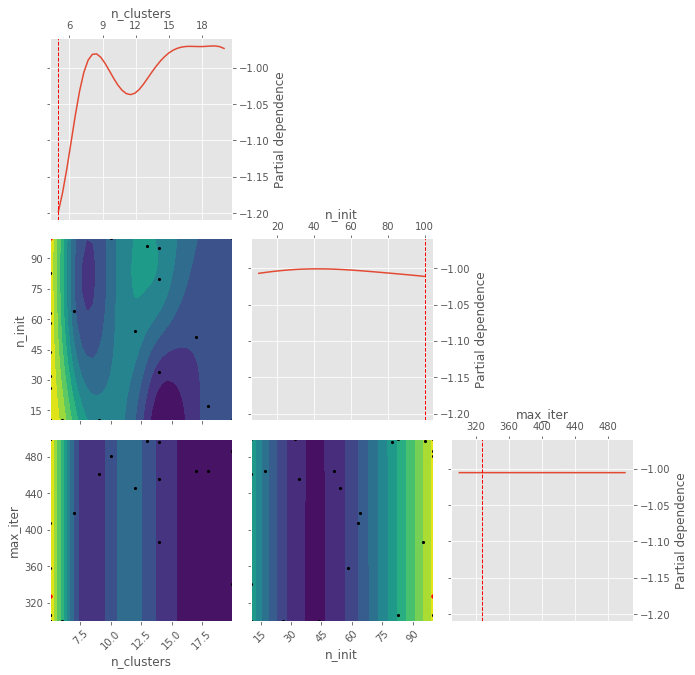

In [33]:
# Plotting the variable influence on the gridsearch

skopt.plots.plot_objective(kmeans_gp, size=3, dimensions=['n_clusters','n_init','max_iter'])

In [34]:
print('Best score: {} | Best params: {}'.format(kmeans_gp.fun, kmeans_gp.x))

Best score: -1.1979941583943963 | Best params: [5, 100, 327]


* We found that the best custom score is -1.198 with 5 clusters, n_init = 100, and max_iter=327. The grid search didn't find any better number of clusters than the baseline model, but found a very minor improvement with n_init at 100 instead of 10. We proceeded with the grid search parameters.


In [35]:
# Prepare model with complete list of "best" parameters
 
const_params = dict({'init': 'k-means++'
                     ,'random_state': 101
                     ,'n_jobs': max_jobs
                     ,'algorithm': 'auto'
                    })

best_params = {'n_clusters':  kmeans_gp.x[0] 
              ,'n_init':  kmeans_gp.x[1]
              ,'max_iter':  kmeans_gp.x[2]
             }

best_params.update(const_params)
print(best_params)

kmeans_best = KMeans(**best_params)

# Update helper object with "best" model 
kmeans.set_model(kmeans_best)

{'n_clusters': 5, 'n_init': 100, 'max_iter': 327, 'init': 'k-means++', 'random_state': 101, 'n_jobs': 30, 'algorithm': 'auto'}


#### Evaluating K-Means Observations and Feature Means

We counted the number of observations per cluster to make sure we have a sufficient number of employees in each cluster to draw valid correlations.

In [36]:
# counting the observation by cluster
kmeans.train()
kmeans.cluster_obs_count()

labels
0      490
1    15588
2     6460
3     1232
4     3504
Name: ppa_rating_last, dtype: int64

* There is sufficient sample size in each cluster to draw inference in this data.

### <i>Agglomerative Clustering</i><a class="anchor" id="ME_AC"></a>

The next model for comparison is the Agglomerative Clustering model.

In [56]:
# base model for Agglomerative Clustering
 
ac = agh(X=X.astype(np.float)
               ,n_clusters= 5
               ,linkage='ward'
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )


In [38]:
ac.train().evaluate_fit()

Silhouette Coefficient: 0.12084248806616195


In [39]:
print('SSE score:',calc_SSB(Xbase,ac.cluster_obj.labels_,scaling=True) )

SSE score: 838234.9677711917


* The model provided a SSE of 838,234 that is not a great improvement from the overall variance of 1,172,782. Hence we use an elbow plot to determine if we can get better scores with a different number of clusters.   

#### Parameter Adjustments

We then ran an elbow curve to identify the best number of clusters that maximizes the Silhouette Score and minimizes the SSE.

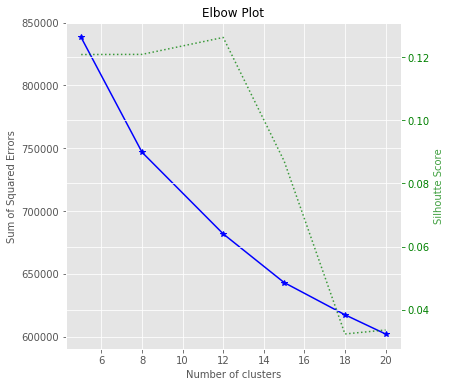

Wall time: 2min 4s


In [40]:
%%time
# Draw elbow to calculate the weights between silhouette and Sum of Squares
cluster_ranges=[5,8,12,15,18,20]
ac.plot_elbow_curve(cluster_ranges=cluster_ranges
                    , second_metric='silhoutte'
                    , n_jobs=max_jobs
                    , figsize=(6,6)) # Elbow Curve with Helper function

* The range of Silhouette is 0.08 and the range of SSE is 230,000. This is roughly the same as the K-Means model, so we kept the same weights for the custom score. This allowed us to compare the scores between the two models.


In [41]:
#Getting number of observation per cluster to make sure the model is not skewed and has a good separation between clusters
ac.train()
ac.cluster_obs_count()

labels
0     5747
1     5916
2     2831
3     1164
4    11616
Name: ppa_rating_last, dtype: int64

* With Agglomerative Clustering we have options to choose between different linkage types, so we tried a different linkage.

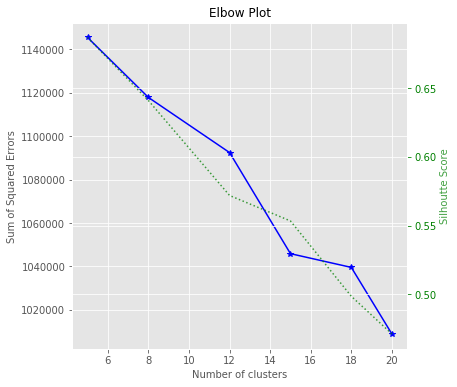

In [42]:
# Testing if average linkage has a better separation between clusters

ac = agh(X=X.astype(np.float)
               ,n_clusters= 5
               ,linkage='average'
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )

cluster_ranges=[5,8,12,15,18,20]
ac.plot_elbow_curve(cluster_ranges=cluster_ranges, second_metric='silhoutte', n_jobs=max_jobs, figsize=(6,6)) # Elbow Curve with Helper function

In [43]:
# we see 5 cluster has the bet silhouette score, without impacting most of the Sum of Square  
ac.train()
ac.cluster_obs_count()

labels
0    27259
1       12
2        1
3        1
4        1
Name: ppa_rating_last, dtype: int64

* We noticed the Average linkage method is returning only 1 cluster containing >95% of the observation. 

* We also noticed that similar behaviour is present with the other linkage types such as Single and Complete. Ward is the only linkage that has a significant sample size across the clusters, hence we proceeded with the grid search using the Ward linkage.

In [44]:
# Grid Search

# set up hyperparameter space 
space = [Integer(5, 20, name='n_clusters')
         #,Categorical(['ward'], name='linkage')
         ]

# Object to scale the inputs before training
weight_s = 3.6
weight_i = 1

# Define the objective function (loss function) to be minimized
@use_named_args(space)
def objective(**params):
    
    model =  cluster.AgglomerativeClustering(linkage='ward'
                                                     ,**params)
    
    std_scl = StandardScaler()
    piped_object = Pipeline([('scale', std_scl),  # do this
                             ('ac_model', model)]) # and then do this

    print("    ",end="")
    for key, value in params.items():
        print("{} = {}".format(key, value),end=', ')
    print("")
    piped_object.fit(Xbase.astype(np.float))
    
    measure_ibase =calc_SSB(Xbase,model.labels_,scaling=True)  
    measure_i =measure_ibase / Xbase_variance
    measure_sbase = mt.silhouette_score(Xbase,model.labels_,random_state=101)
    measure_s = -(measure_sbase+1)*.5 #range of Silhouette is -1 to 1
    print("    -> base inertia {} base silhouette {}".format( measure_ibase,measure_sbase))
    print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
    measure =(measure_i*weight_i) +(measure_s*weight_s)
    return (measure)


In [45]:
ac_gp = gp_minimize(objective
                     ,space
                     ,n_random_starts=4 # 10 random points to start 
                     ,n_calls=10 # pick 25 points total (including n_random_starts) to dinf optimal combination of hyperparameters
                     ,verbose=True
                     ,n_jobs=max_jobs
                     ,random_state=101
                    )

Iteration No: 1 started. Evaluating function at random point.
    n_clusters = 13, 
    -> base inertia 669526.2836951488 base silhouette -0.13524184476386167
    -> norm inertia 0.5708872439167285 norm silhouette -0.43237907761806915
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 69.7166
Function value obtained: -0.9857
Current minimum: -0.9857
Iteration No: 2 started. Evaluating function at random point.
    n_clusters = 19, 
    -> base inertia 607800.4697140914 base silhouette -0.22890860384670683
    -> norm inertia 0.5182552850522018 norm silhouette -0.38554569807664657
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 63.4842
Function value obtained: -0.8697
Current minimum: -0.9857
Iteration No: 3 started. Evaluating function at random point.
    n_clusters = 20, 
    -> base inertia 602163.2656269015 base silhouette -0.22879756552011082
    -> norm inertia 0.513448591150701 norm silhouette -0.38560121723994456
Iteration No: 3 ended. Evalu

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, 
    -> base inertia 838234.9677711917 base silhouette -0.04497451375040201
    -> norm inertia 0.714740648962204 norm silhouette -0.47751274312479897
Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 67.3182
Function value obtained: -1.0043
Current minimum: -1.0658
Iteration No: 8 started. Searching for the next optimal point.
    n_clusters = 16, 
    -> base inertia 632661.881031995 base silhouette -0.2252265750860492
    -> norm inertia 0.5394539488430031 norm silhouette -0.3873867124569754
Iteration No: 8 ended. Search finished for the next optimal point.
Time taken: 65.7268
Function value obtained: -0.8551
Current minimum: -1.0658
Iteration No: 9 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 15, 
    -> base inertia 643136.2417355294 base silhouette -0.10322129135690453
    -> norm inertia 0.5483851574593823 norm silhouette -0.44838935432154775
Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 65.3755
Function value obtained: -1.0658
Current minimum: -1.0658
Iteration No: 10 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 15, 
    -> base inertia 643136.2417355294 base silhouette -0.10322129135690453
    -> norm inertia 0.5483851574593823 norm silhouette -0.44838935432154775
Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 65.1753
Function value obtained: -1.0658
Current minimum: -1.0658


In [46]:
#skopt.plots.plot_objective(ac_gp, size=4, dimensions=['n_clusters'])
#can't draw influence plot as we have only one dimention

In [47]:
print('Best score: {} | Best params: {}'.format(ac_gp.fun, ac_gp.x))

Best score: -1.0658165180981896 | Best params: [15]


* The grid search selected 15 clusters as the optimal amount using the custom metric. But we noticed a small difference between the scores across the different clusters (5 clusters yield a score of -1.004 while 15 clusters yield a score of -1.0658). As a lower number of clusters is more usable from a business point of view, we would like to use an alternative visual representation to highlight the difference in the SSEs between values by varying the number of clusters.


##### Dendogram

The first step is to scale the features.

In [48]:
#Scaling X

std_scl = StandardScaler()
Xbase_scale =std_scl.fit(Xbase).transform(Xbase)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [49]:
import scipy.cluster.hierarchy as shc
Z=shc.linkage(Xbase, method='ward')  

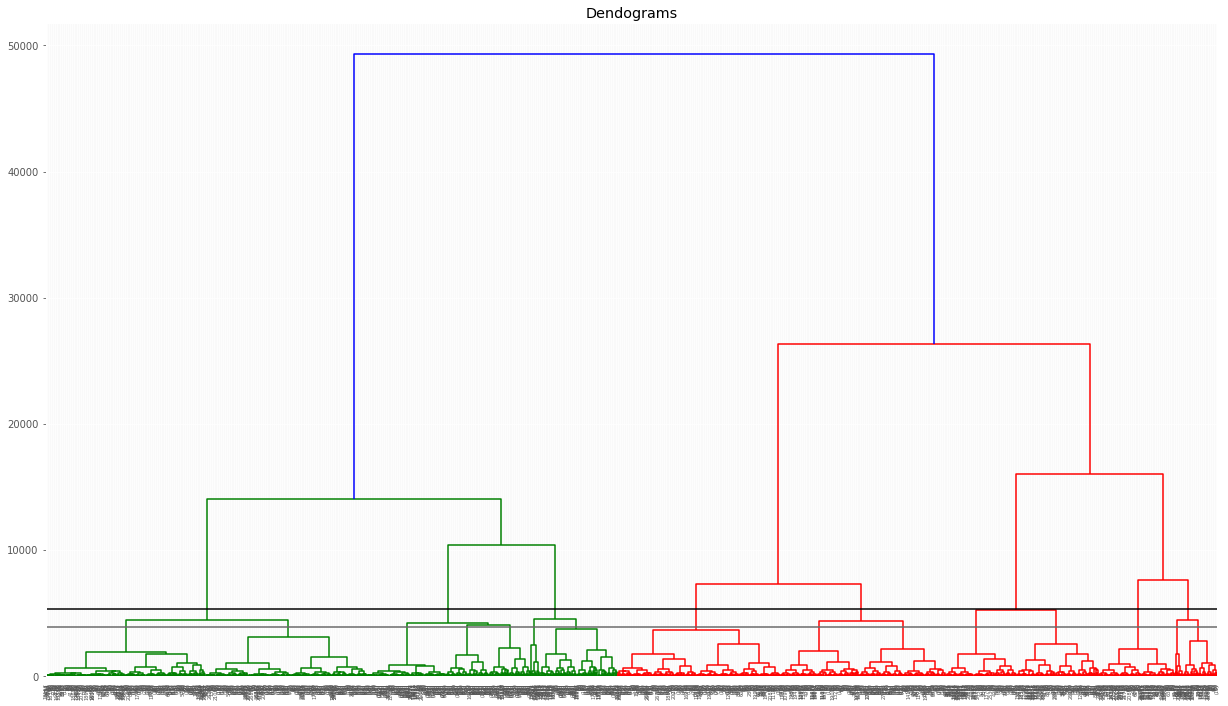

In [50]:
plt.figure(figsize=(21, 12))
plt.title("Dendograms")
dend = shc.dendrogram(Z,truncate_mode='level',p=10) #limiting to 10 levels for visiblity
plt.axhline(y=5300, c='k')
plt.axhline(y=3900, c='dimgray')


* The upper dark horizontal line at a distance of 5,300 includes 8 clusters, while the lower horizontal line at 3,900 includes 15 clusters. 

* There is not much gain on distance between the two lines, but the number of clusters increases substantially. From the business point of view we prefer to have a smaller number of clusters. Hence, we can use a total of 8 clusters for this model.

In [51]:
# defining model with the best parameters

n_clusters = 8 #ac_gp.x[0]
ac = agh(X=X.astype(np.float)
               ,n_clusters= n_clusters
               ,linkage="ward"
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )

ac.train().evaluate_fit()

Silhouette Coefficient: 0.12088976003290226


In [52]:
weight_s = 3.6
weight_i = 1

measure_ibase =calc_SSB(Xbase,ac.cluster_obj.labels_,scaling=True)  
measure_i =measure_ibase / Xbase_variance
measure_sbase = mt.silhouette_score(Xbase,ac.cluster_obj.labels_,random_state=101)
measure_s = -(measure_sbase+1)*.5 #range of Silhouette is -1 to 1
print("    -> base inertia {} base silhouette {}".format( measure_ibase,measure_sbase))
print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
measure =(measure_i*weight_i) +(measure_s*weight_s)
print("Base model custom measure ", measure)

    -> base inertia 746832.7462686616 base silhouette -0.11009844272462242
    -> norm inertia 0.6368044071862131 norm silhouette -0.4449507786376888
Base model custom measure  -0.9650183959094665


* The Agglomerative Clustering model, using the best parameters, has a custom score of -0.965 while the K-Means model has a score of -1.198. We prefer a lower custom score and proceeded the evaluation using the K-Means score and its best parameters.


### <i>Final Model</i><a class="anchor" id="ME_Final"></a>


The K-Means model produced the best results, both in terms of performance and fitness for the business case.

Here is a list of clusters and their respective number of samples.


In [53]:
# counting the observation by cluster
kmeans.train()
kmeans.cluster_obs_count()

labels
0      490
1    15588
2     6460
3     1232
4     3504
Name: ppa_rating_last, dtype: int64


* We used external validation measures to extract insights from the clusters. In particular, we looked at the distribution of the **voluntary_attrition** variable across the various clusters. We first arranged the clusters from low to high values of **voluntary_attrition**. From there, we compared the characteristics of individual attributes within each cluster to see if we could extract any meaningful insight.

* We compared the characteristics of the features across the clusters by looking at the mean of the feature values in each cluster. Since we used globular clustering methods, this seemed to be a valid means of comparing the features across the clusters.

In [54]:
# mean value by variable and cluster
kmeans.cluster_means() # Will be sorted by default since evaluate_by has been set

labels,2,3,4,1,0
ppa_rating_last,3.428173,3.554789,3.565354,3.416186,3.236735
comparatio_last,1.005561,0.987213,0.979099,0.967594,0.998719
awards_points_cnt_sum_last,5.395666,3.616071,2.307078,1.580639,5.204082
awards_points_sum_last,253.141331,257.607955,147.199486,88.320310,204.406122
awards_bonus_cnt_sum_last,0.741796,1.044643,0.825913,0.262830,0.046939
awards_bonus_sum_last,2.034013,6.031274,4.722991,0.791229,0.076570
awards_peer_cnt_sum_last,1.944737,1.180195,0.722888,0.590647,1.606122
movement_lateral_cnt_sum_last,0.260217,0.250000,0.236872,0.120349,0.120408
transfer_event_cnt_sum_last,0.420279,1.090909,0.267123,0.156531,0.687755
movement_demote_event_cnt_sum_last,0.076316,0.072240,0.053082,0.024249,0.008163


* Since we were trying to compare over 40 features across 5 clusters, using a tabular format was not very easy. Hence we developed a special function in the cluster helper object in the *more* library to visualize a heatmap of the cluster means.

* For plotting this heatmap, we performed a row-wise scaling (min-max) of the cluster means. This ensured that all the values in the heatmap were between 0 and 1, and that all values could be displayed on a single heatmap with a common scale. For example, for awards_points_cnt_sum_last, cluster 2 had the highest value so its value in the heatmap would translate to 1. Cluster 1 had the lowest value so its value on the heatmap would translate to 0. All other clusters would have values in the heatmap ranging between 0 and 1 depending on their relative position. Similarly, for mgr_11_nunique, cluster 0 has the highest value so its corresponding value in the heatmap would be 1. Cluster 1 had the lowest value so its corresponding value in the heatmap would correspond to 0. All other clusters are also showing a value of 0 since their absolute value is very close to the minimum value for this feature.

* Another important thing to note is that while **voluntary_attrition** was not used to cluster the data, we do compare the frequency of this variable across the final clusters to evaluate potentiality of features correlating to attrition. Hence we included the frequency of this variable across the clusters in the heatmap as well (last row). The clusters here are also ordered from low to high **voluntary_attrition**. 

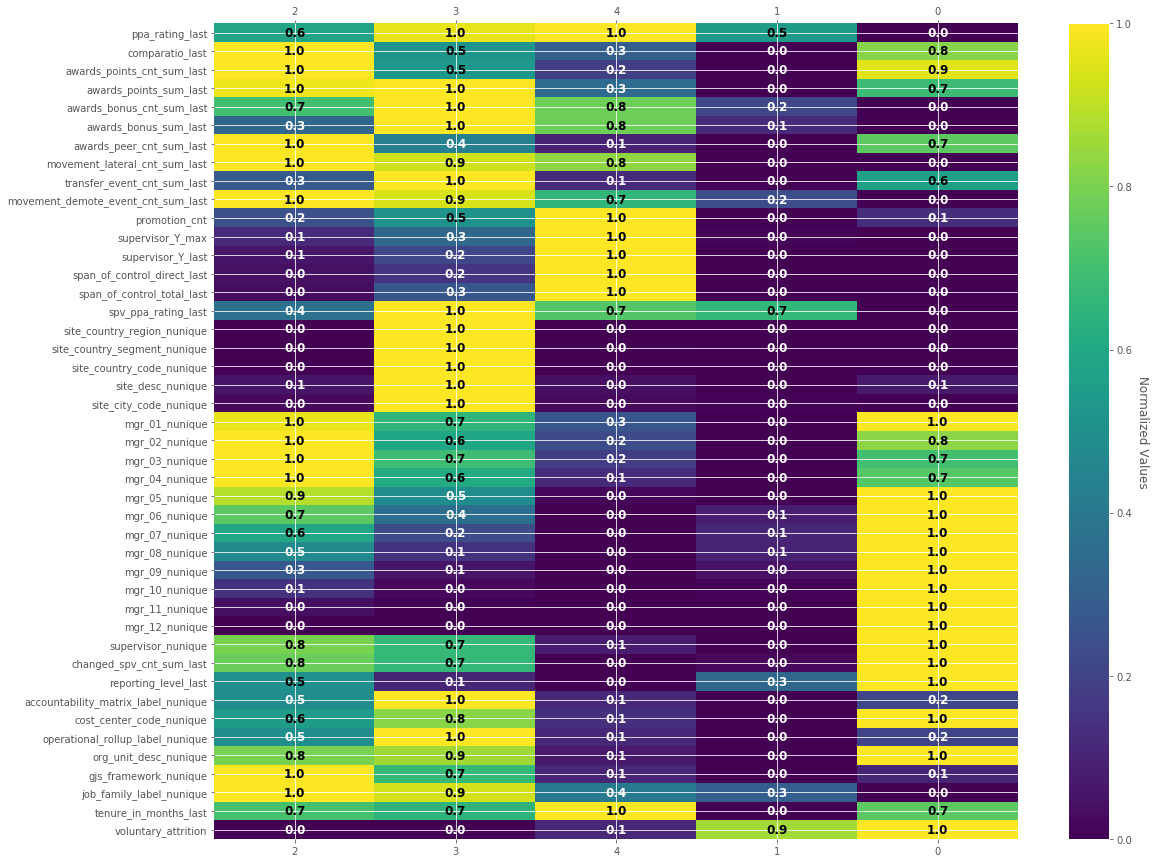

In [55]:
# heatmap ny varable, cluster, and normalized mean value

kmeans.plot_means_heatmap(figsize=(18,15), annot=True)

### <i>Cluster Comparisons</i><a class="anchor" id="ME_CC"></a>

The above methodology allows us to quickly compare the features across the clusters and find features that are correlated to higher attrition.

For example, clusters 0 and 1 have the highest relative attrition while clusters 2, 3 and 4 have relatively lower attrition. Since we are doing min-max scaling in the heatmap, just looking at the colors and values in the heatmap could be misleading (since a min value of 0.20 would translate to 0 and a max value of 0.21 would translate to 1, although they may not be practically different). Hence we should always compare this back to the tabular results. Indeed, these findings hold true (tabular view above heatmap). Clusters 0 and 1 have a mean attrition of 28% and 27% respectively whereas clusters 2, 3, and 4 have a relatively lower attrition (between 16% and 18%).

By looking at the feature means between cluster groups (0,1) and (2,3,4) we can gain some valuable insights. 

##### **High Attrition Clusters**

* **Underground** (Cluster 0) seems to be the only cluster which has a relatively high number of managers from level 8 onwards. These are the people towards the bottom of the organizational structure of the company and distant from the CEO and Senior VPs. These employees seem to have higher attrition levels (28%), that can be correlated with their position in the company's structure. People more distant from upper management may feel silenced in the decision making process. There are different approaches such as focus groups with leaders, anonymous surveys, or even an organizational restructure to reduce the number of layers in the organization to boost inclusion and reduce turnover rate.

* **Overlooked** (Cluster 1) seems to be unique as well since it consists of employees who have not received many bonus awards. They also have the lowest average tenure of all the clusters at around 52 months (compared to > 90 months for all other clusters). These employees have a pretty high attrition rate (26%) that can be correlated with the low recognition received and lower experience in the company. This can be an indicator that the hiring or on-boarding process could be improved. Furthermore this group has the largest number of employees, indicating that the awards program is not widely applied. This could also indicate there are not many opportunities for new and different job experiences (based on GJS and site variables), especially for low-tenured employees. A shadow program, job rotation, or mentorship program may help on improving employee best fit.

##### **Low Attrition Clusters**

* **Golden Children** (Cluster 2) seems to consist of employees who have the highest bonuses and peer recognized awards. It seems that this group has the highest comparatio (compensation), but the heatmap is a little misleading here as the difference between the highest (1.01) and lowest (0.97) values is not much and not practically significant. This group has the lowest attrition (17%) and can be an indication of the negative correlation between recognition and turnover.  

* **Globe Trotters** (Cluster 3) seems to consist of employees who have worked in multiple countries. This group has also a very low attrition rate (16%). Even if people with a rich and diverse experience are usually at risk of attrition, we notice that the company associates a good retention and recognition practice with these individuals.

* **Tried and Trusted** (Cluster 4) seems to consist of employees who are in a supervisory role, have a history of many promotions, and attain high tenure. We see a low turnover for this cluster (17%), and this can be an indication that the company is able to retain leaders. The employees in this cluster may be candidates as mentors in the mentorship program. 



### <i>Notable Observations</i><a class="anchor" id="ME_NO"></a>

##### Bonus

From the above results we find some interesting associations. From the *Underground* cluster, we find that being in a lower level in the hierarchy is associated with a higher attrition rate. What is even more interesting is that this group of employees were given decent award points (small rewards of less than $200 value) but very low bonuses (higher value monetary awards). Hence we can draw insights that providing small awards is probably not a substitute for a bonus and may not be enough to make employees feel appreciated enough to stay.

This fact is also reinforced from the <em>Overlooked</em> cluster, where employees that have not received very many awards, bonuses or even peer recognition, also see some of highest rates of attrition.

##### Tenure

The <em>Overlooked</em> cluster shows another interesting (though not surprising) finding. As explained above, employees in this bucket have the lowest tenure of all groups and one of the highest attrition rates. Although we do not have an age related variable in our dataset, we can speculate with high certainty that this correlated highly with younger employees. This jives well with our intuition that younger employees are more flexible and more open to moving around, and this could be why this group has higher attrition. 

Since this group had some of the lowest bonus awards, it would be interesting to see if the attrition reduces for this group in the future with more liberal bonus policies.

##### Supervisory Roles and Inter-Country Transfers

Another interesting association is between supervisors and lower attrition as indicated by the <em>Tried and Trusted</em> cluster. This is also intuitive since being in a supervisory role might mean more trust in the employee which makes the employee feel appreciated. 

Similarly, an employee who is approved for international transfers is usually trusted by the employer for a high profile role, and this in turn helps the employee feel appreciated.

Both these factors are likely to be associated with lower attrition which is what we see in our results as well.

## <font color = maroon>Deployment</font> <a class="anchor" id="Section8"></a>

The purpose of this analysis is to look for opportunities for the human resources team to understand symptoms of attrition in order to develop early intervention processes. The analysis included additional data (**voluntary_attrition**), provided by the subject matter experts (SME) and not used in previous phases of the study, that offered a different point of view relevant for our purposes of understanding how to improve retention. 

Clustering based on attributes alone was not particularly useful, but by comparing clusters with **voluntary_attrition** we were able to derive actionable insights, such as attrition being associated with peer acknowledgment versus "official" acknowledgment. This was valuable information, as the company encourages peer acknowledgment. However, the data suggests that this is no substitution for official recognition if the desire is to reduce attrition. This is important information, so an action item has been noted by the SME to include this as verbiage in supervisor and management training.

Based on our findings, we recommend the Company rerun this analysis on an annual basis, as it will require some review and fine-tuning. As the effect of other changes implemented as part of this study will take some time to realize, this cluster analysis should be included as part of the fiscal year end process to provide direction for new goals.

As mentioned in the previous phases of the study, a pilot group is recomended to test the impact on the program changes. It will be helpful to include a pilot indicator to analyze the attrition impact. This analysis will help differentiate the attrition factors of the pilot group from the rest of the organization.

This information will be aggregated and used to further tune the model. The updated model and any significant changes from the differentiation analysis will be  presented to the human resources leadership and other employees with responsibilites around employee retention.



[Back to Table of Contents](#TOC)



## <font color = maroon>Exceptional Work</font> <a class="anchor" id="Section9"></a>



### <i>Cluster Evaluation Heatmap</i><br> <a class="anchor" id="EW_1"></a>

In this clustering analysis, we sought an alternative method to conveying our cluster outputs in a meaningful and insight-driven mode. As a result, we elected to use a heatmap for cluster means to generally depict any differences between our clusters in a visual manner. 

The drawback here is that our values are scaled via min-max scaling. Because of this, our heatmap may show massive differences when there is virtually no practical difference. For example, for a range with a minima of 0.20 and a maxima of 0.21, our heatmap would show a large difference between these two even though their actual difference is very minimal. 

To extract meaning out of our heatmaps, we cross-compare our visual results to our tabular results, focusing on attributes that appear to have large differences between clusters. This allows us to focus our attention towards potentially influential attributes while diverting our attention away from inherent noise. 


### <i>Python "More" Package</i><br> <a class="anchor" id="EW_2"></a>

In order to perform our clustering practice (as well as previous lab activities), we had to import a wide variety of libraries and many user defined functions. These themselves are by no means troublesome. However, this does mean that many cell blocks dedicated to loading packages and defining functions are introduced. As a result, our notebook becomes inundated with many cells that, while essential, provide no meaningful value to our purpose and subsequently drowns the reader in blocks of code. 

To amend this, Nikhil has compiled many of the Python packages and user defined functions that we have used for the purposes of this course and developed a package (<b>more</b>) that allows the same functionality at a fraction of the code. 

One (minor) drawback is the additional time needed to maintain, update, and redistribute the package for proper usage. However, this package has been beyond useful in the course of our lab. It has also been distributed to our peers across all sections to help condense their code as well. 

Information about the package can be found here: https://pypi.org/project/more/ .


[Back to Table of Contents](#TOC)


## <font color=maroon>Conclusion</font><a class="anchor" id="Section10"></a>

The cluster analysis was a natural extension of the prior classification phases of this study where we sought to identify candidates for promotion and propose a promotion window for promoted candidates. In this phase, we confined our study to only promoted candidates and searched for indicators of **voluntary_attrition** in order to identify opportunities to improve retention. Based on the cluster analysis, the K-Means clustering provided the best results in terms of interpretable and logical clusters that provided both expected and new insights into employee attrition. The clustering uncovered opportunities around recognition and incentives that can be incorporated and tested in the performance management process, particularly for candidates for promotion and tracked as part of the overall employee retention program. The clustering approach suggested opportunities to improve retention through programs such as mentorships, focus groups with leaders, and surveys.


[Back to Table of Contents](#TOC)